In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
from scipy import interpolate
import warnings
warnings.filterwarnings("ignore")


In [2]:
def plot_papi_data(data1, data2, name, num_cols=2, interpolation=False, log_scale=True):
       # Inherent to papi data
       columns_to_plot = ['Wall clock time', 'PAPI_TOT_CYC', 'PAPI_TOT_INS', 'PAPI_L1_DCM',
              'PAPI_L2_DCM']

       # Plot stuff
       num_rows = int(np.ceil((len(columns_to_plot) - 1) / num_cols))+1
       fig, axis = plt.subplots(num_rows, num_cols, figsize=(9, 12), constrained_layout=True)

       i= 0
       for column in tqdm(columns_to_plot):
              # Plot stuff
              row, col = int(i/num_cols), i%num_cols
              i +=1

              # Load data
              data = pd.read_csv(data1, sep='\t')

              # Get atributes
              x_axis = data.columns[0]
              label_name = '#Buckets=10'

              # Get axis
              ax = axis[row, col]

              # Plot
              ax.plot(data[x_axis], data[column], 'o', label=label_name)

              # Interpolate and plot
              if interpolation:
                     #f = interpolate.interp1d(data[x_axis], data[column])
                     #xnew = np.linspace(data[x_axis].min(), data[x_axis].max(), num=100, endpoint=True)
                     #ax.plot(xnew, f(xnew), '--')
                     ax.plot(data[x_axis], data[column], '--b', alpha=0.8)

              # Labels
              ax.set_xlabel(x_axis)
              ax.set_ylabel(column)

              # Scales
              if log_scale:
                     ax.set_xscale('log')
                     ax.set_yscale('log') 

              # Legend
              ax.legend(loc='lower right')

              #####################################
              # Twin the axis
              ax2 = ax.twiny()

              # Load the second data
              data = pd.read_csv(data2, sep='\t')

              # Get atributes
              x_axis = data.columns[0]
              label_name = 'Array Size=100000'

              # Plot
              ax2.plot(data[x_axis], data[column], 'or', label=label_name)

              #  Interpolate and plot
              if interpolation:
                     #f = interpolate.interp1d(data[x_axis], data[column])
                     #xnew = np.linspace(data[x_axis].min(), data[x_axis].max(), num=100, endpoint=True)
                     #ax2.plot(xnew, f(xnew), '--r')

                     ax2.plot(data[x_axis], data[column], '--r', alpha=0.8)

              # Labels
              ax2.set_xlabel(x_axis)
              ax2.set_ylabel(column)

              # Scales
              if log_scale:
                     ax2.set_xscale('log')
                     ax2.set_yscale('log')

              # Legend
              ax2.legend(loc='upper right')


       # TIGHT!
       plt.tight_layout()

       # Save image & Show
       fig.savefig(join(os.getcwd(), 'graficos', name))
       fig.show()

# Papi base benchmark

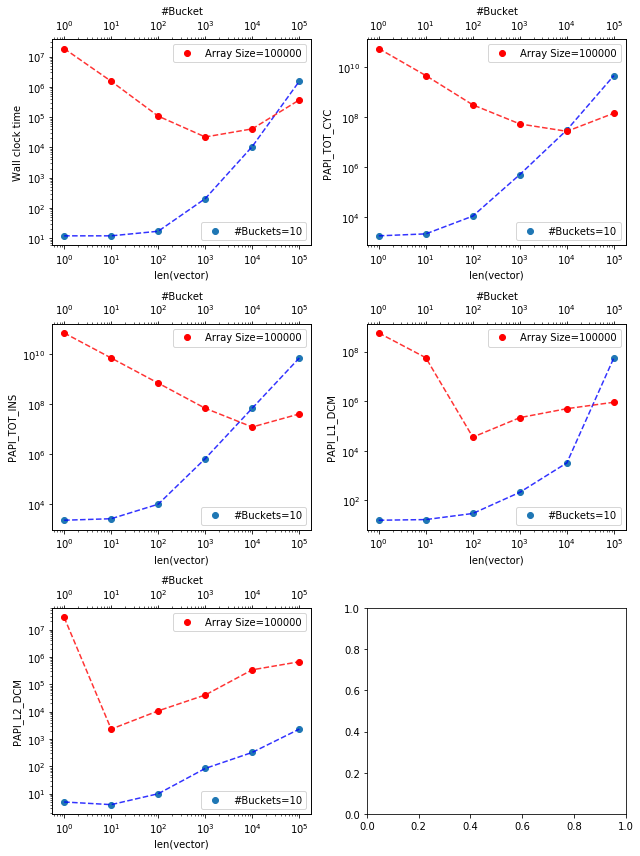

In [3]:
plot_papi_data('data/sequential_PAPI_fixed_num_buckets_10.txt', 
'data/sequential_PAPI_fixed_tam_buckets_10000.txt', 
name='sequential_PAPI.png', interpolation=True)

# Papi with free

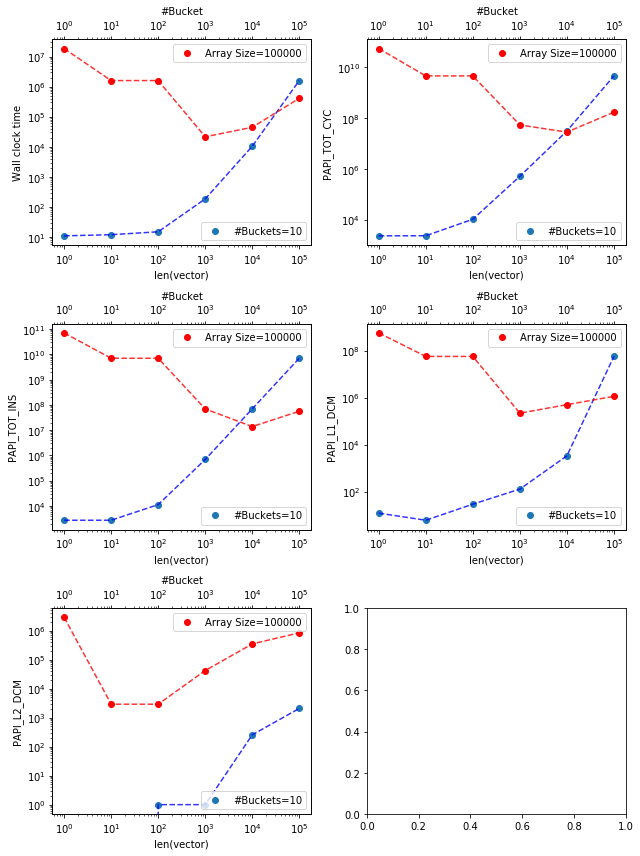

In [4]:
plot_papi_data('data/sequential_PAPI_FREE_fixed_num_buckets_10.txt', 
'data/sequential_PAPI_FREE_fixed_tam_buckets_10000.txt', name='sequential_PAPI_FREE.png',
interpolation=True)

# Papi with quick sort

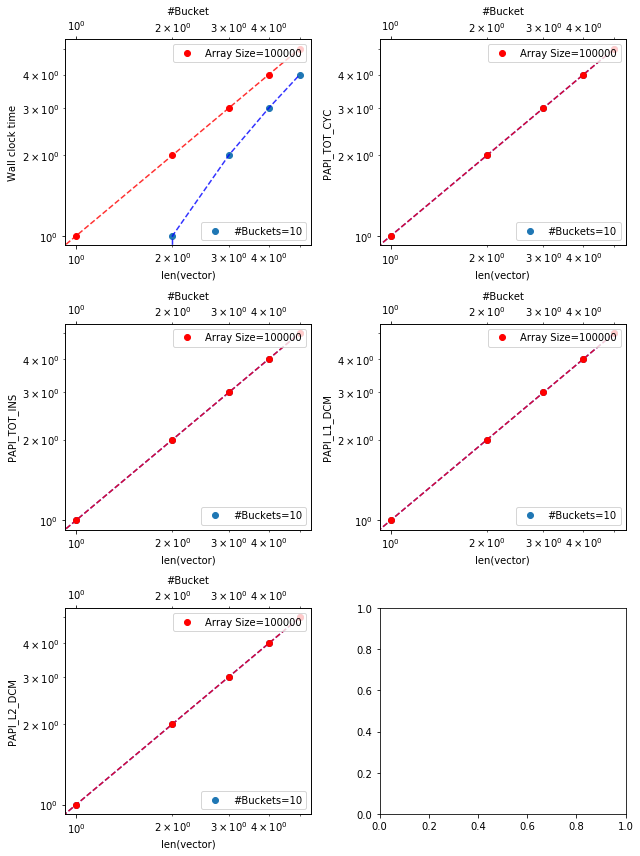

In [5]:
plot_papi_data('data/sequential_PAPI_QUICKSORT_fixed_num_buckets_10.txt', 
'data/sequential_PAPI_QUICKSORT_fixed_tam_buckets_10000.txt', name='sequential_PAPI_QUICKSORT.png',
interpolation=True, log_scale=True)